# Loan Application Status Prediction

The dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv('C:/Users/jdjra/OneDrive/Desktop/Internship/evaluation projects/2nd phase/loanapplication.csv')

In [63]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. Dataset is imblanced.

1. 1st ,2nd and 3rd quartile has major differences in many of the columns.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

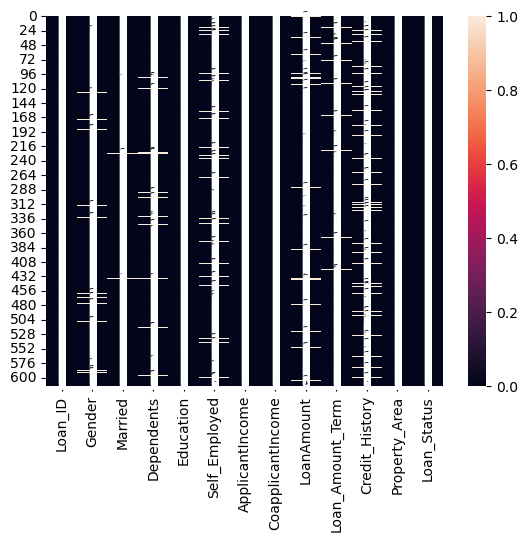

In [66]:
sns.heatmap(df.isna(),annot=True)
df.isna().sum()

Many columns with multiple null values are found. We will deal it with later on.

In [67]:
df['Loan_ID'].nunique()

614

Loan_ID has distinct values in all the data frame,therefore removing it.

In [68]:
df=df.drop(['Loan_ID'],axis=1)

In [69]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [71]:
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [72]:
catcols=[]
numcols=[]
for i in df.dtypes.index:
  if df[i].dtypes == 'object':
    catcols.append(i)
  else:
      numcols.append(i)

In [73]:
catcols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [74]:
numcols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# EDA

Male      489
Female    112
Name: Gender, dtype: int64

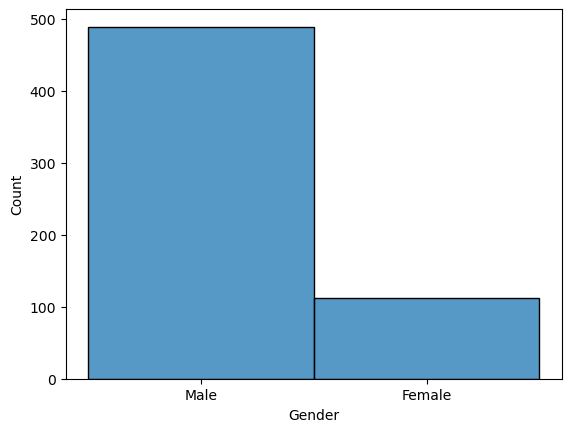

In [75]:
sns.histplot(df['Gender'])
df['Gender'].value_counts()

Male loan applications are more than Females.

Yes    398
No     213
Name: Married, dtype: int64

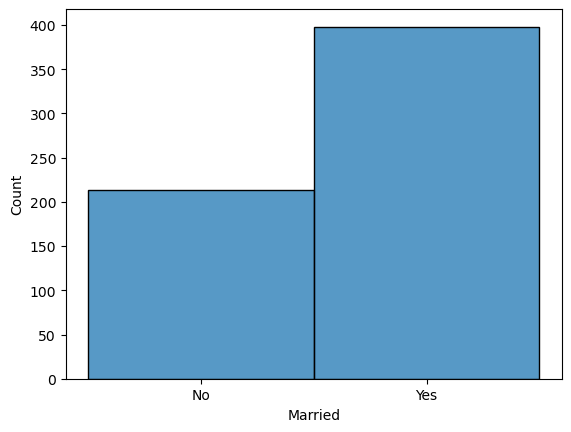

In [76]:
sns.histplot(df['Married'])
df['Married'].value_counts()

Married loan applicants are more in number.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

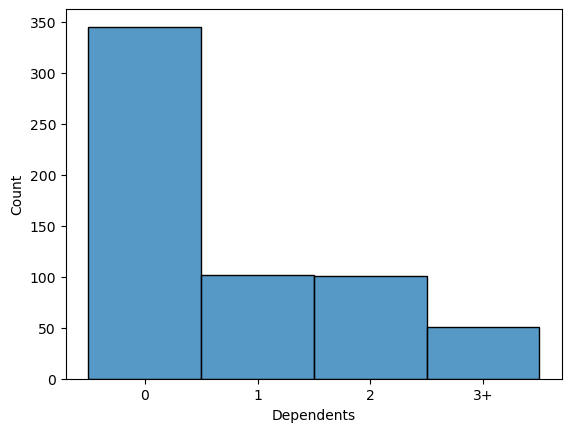

In [77]:
sns.histplot(df['Dependents'])
df['Dependents'].value_counts()

Loan appplicants with 0 dependents are the highest and 3+ are the lowest.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

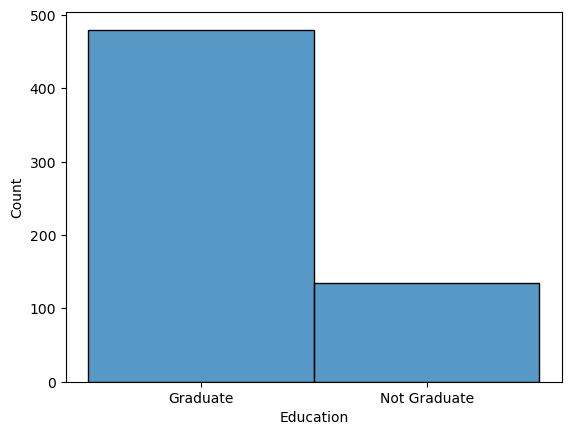

In [78]:
sns.histplot(df['Education'])
df['Education'].value_counts()

Graduate loan applicants are very high than non-graduate.

No     500
Yes     82
Name: Self_Employed, dtype: int64

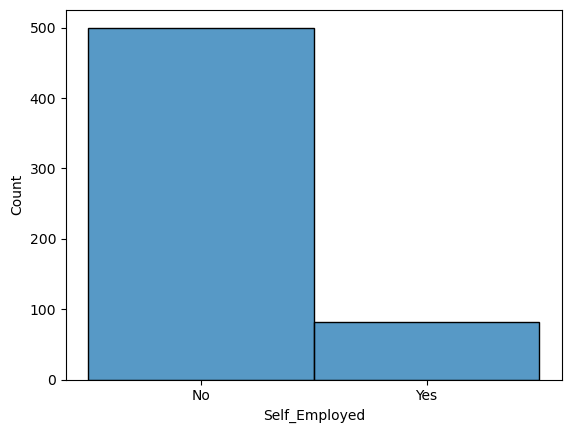

In [79]:
sns.histplot(df['Self_Employed'])
df['Self_Employed'].value_counts()

Number of self employed applicants are very low (500) compared to not self employed (82).

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

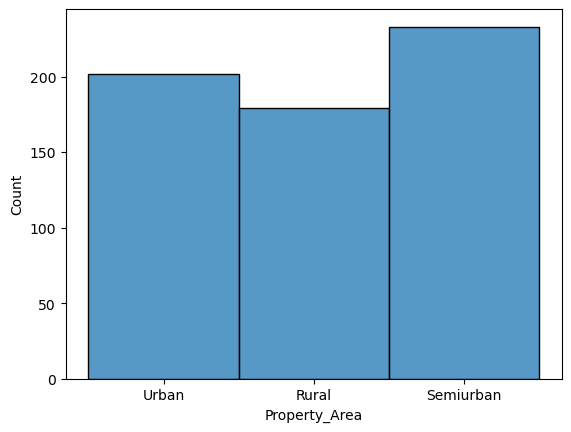

In [80]:
sns.histplot(df['Property_Area'])
df['Property_Area'].value_counts()

Number of loan applicants having property in urban,rural,semiurban areas are very close.

Y    422
N    192
Name: Loan_Status, dtype: int64

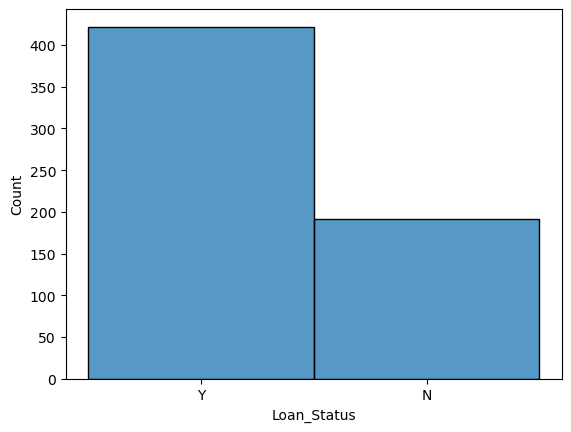

In [81]:
sns.histplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

1. Loan_Status is our target variable.
2. Class imbalance found.
3. Loan regection is low compared to approval.

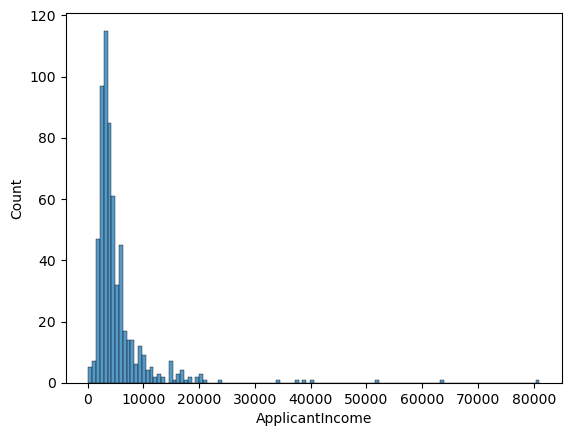

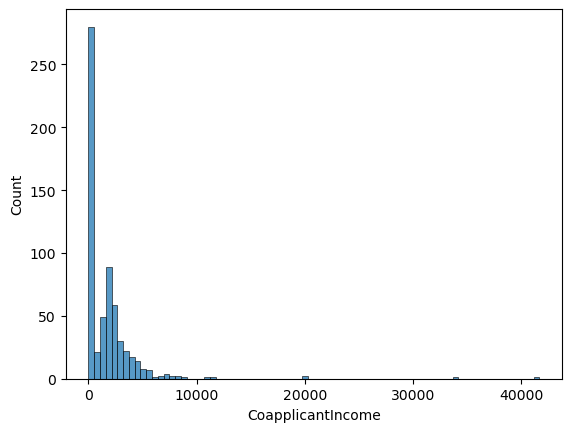

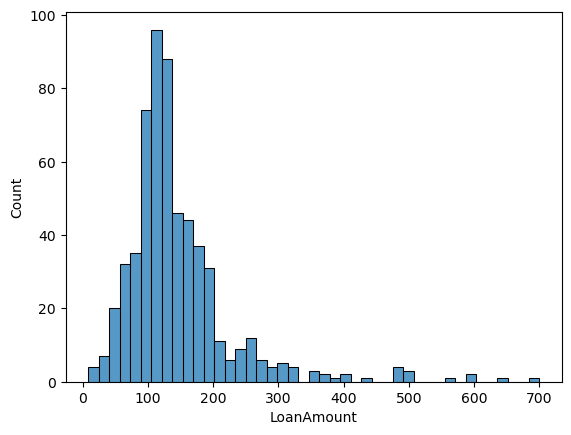

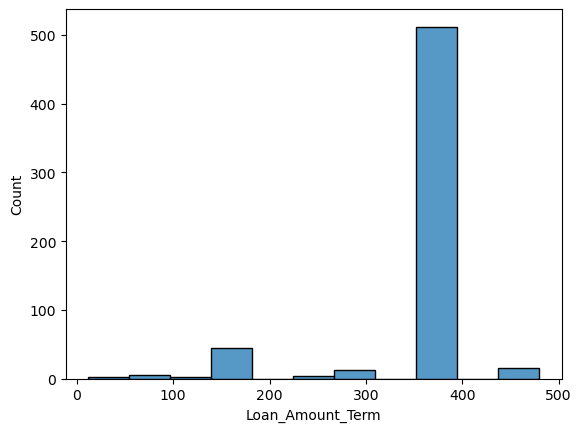

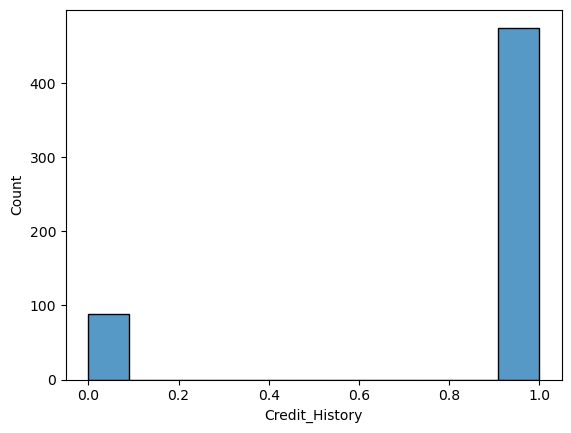

In [82]:
for i in numcols:
    sns.histplot(df[i])
    plt.show()
    plt.tight_layout

1. ApplicantIncome data is negatively skewed.
2. CoapplicantIncome data is also negatively skewed.
3. Loan Amount data is negatively skewed and with multiplt outliers.

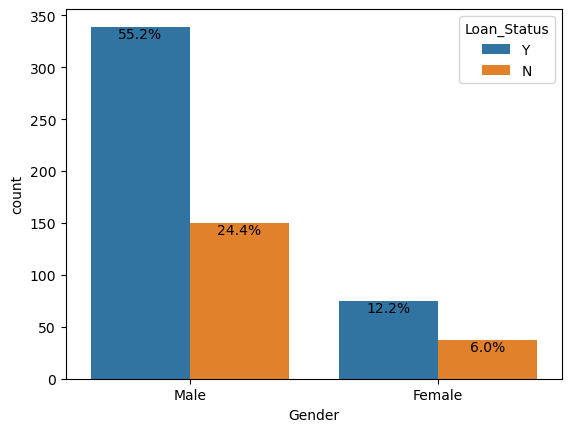

In [83]:
ax = ax=sns.countplot(x='Gender',hue='Loan_Status',data=df)
total_count=len(df['Gender'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

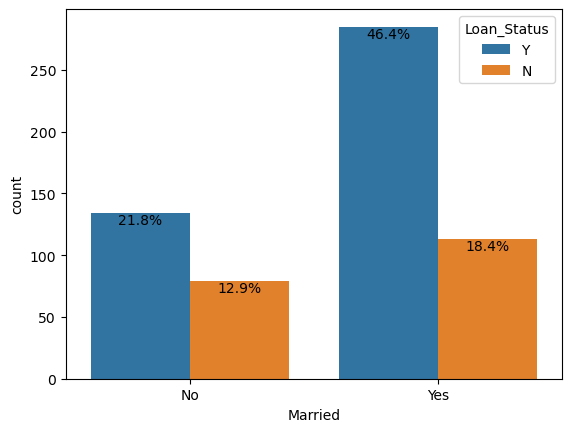

In [84]:
ax = ax=sns.countplot(x='Married',hue='Loan_Status',data=df)
total_count=len(df['Married'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

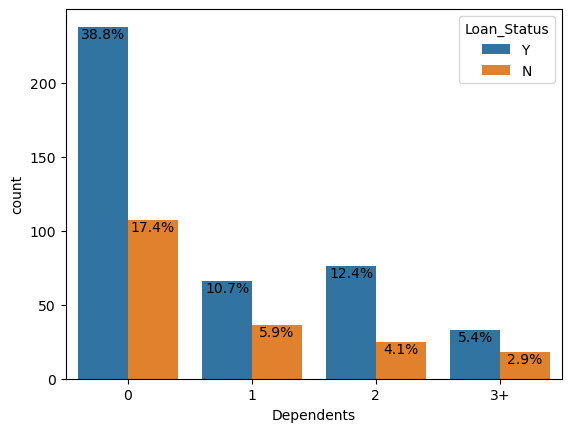

In [85]:
ax = ax=sns.countplot(x='Dependents',hue='Loan_Status',data=df)
total_count=len(df['Dependents'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

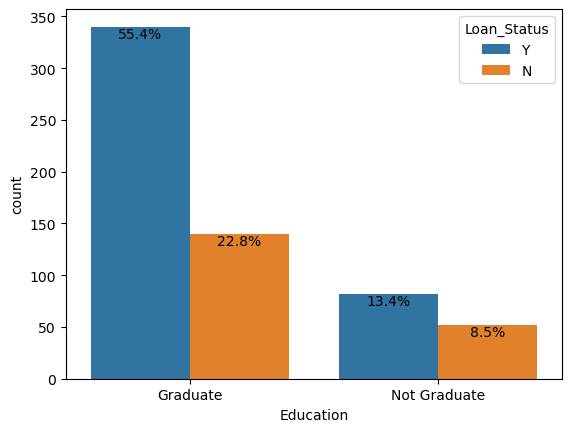

In [86]:
ax = ax=sns.countplot(x='Education',hue='Loan_Status',data=df)
total_count=len(df['Education'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

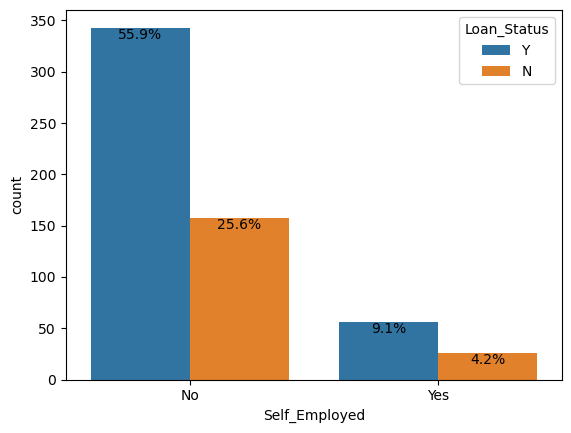

In [87]:
ax = ax=sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)
total_count=len(df['Self_Employed'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

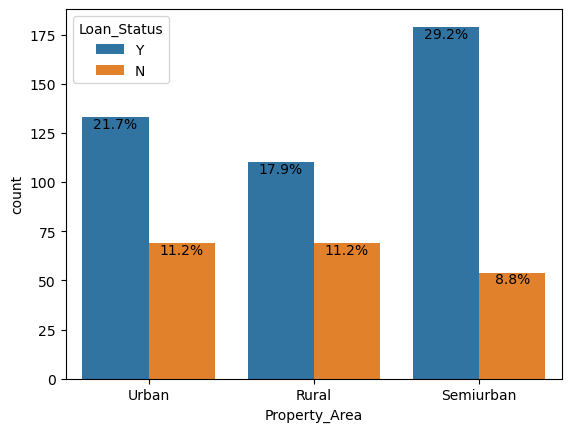

In [88]:
ax = ax=sns.countplot(x='Property_Area',hue='Loan_Status',data=df)
total_count=len(df['Property_Area'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

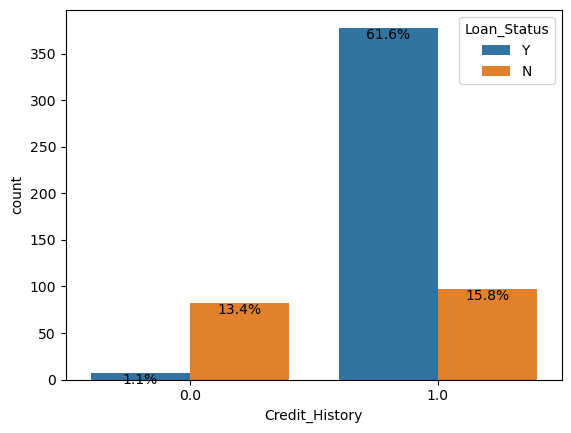

In [89]:
ax = ax=sns.countplot(x='Credit_History',hue='Loan_Status',data=df)
total_count=len(df['Credit_History'])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total_count)
    x=p.get_x()+p.get_width()/2
    y =p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='top')

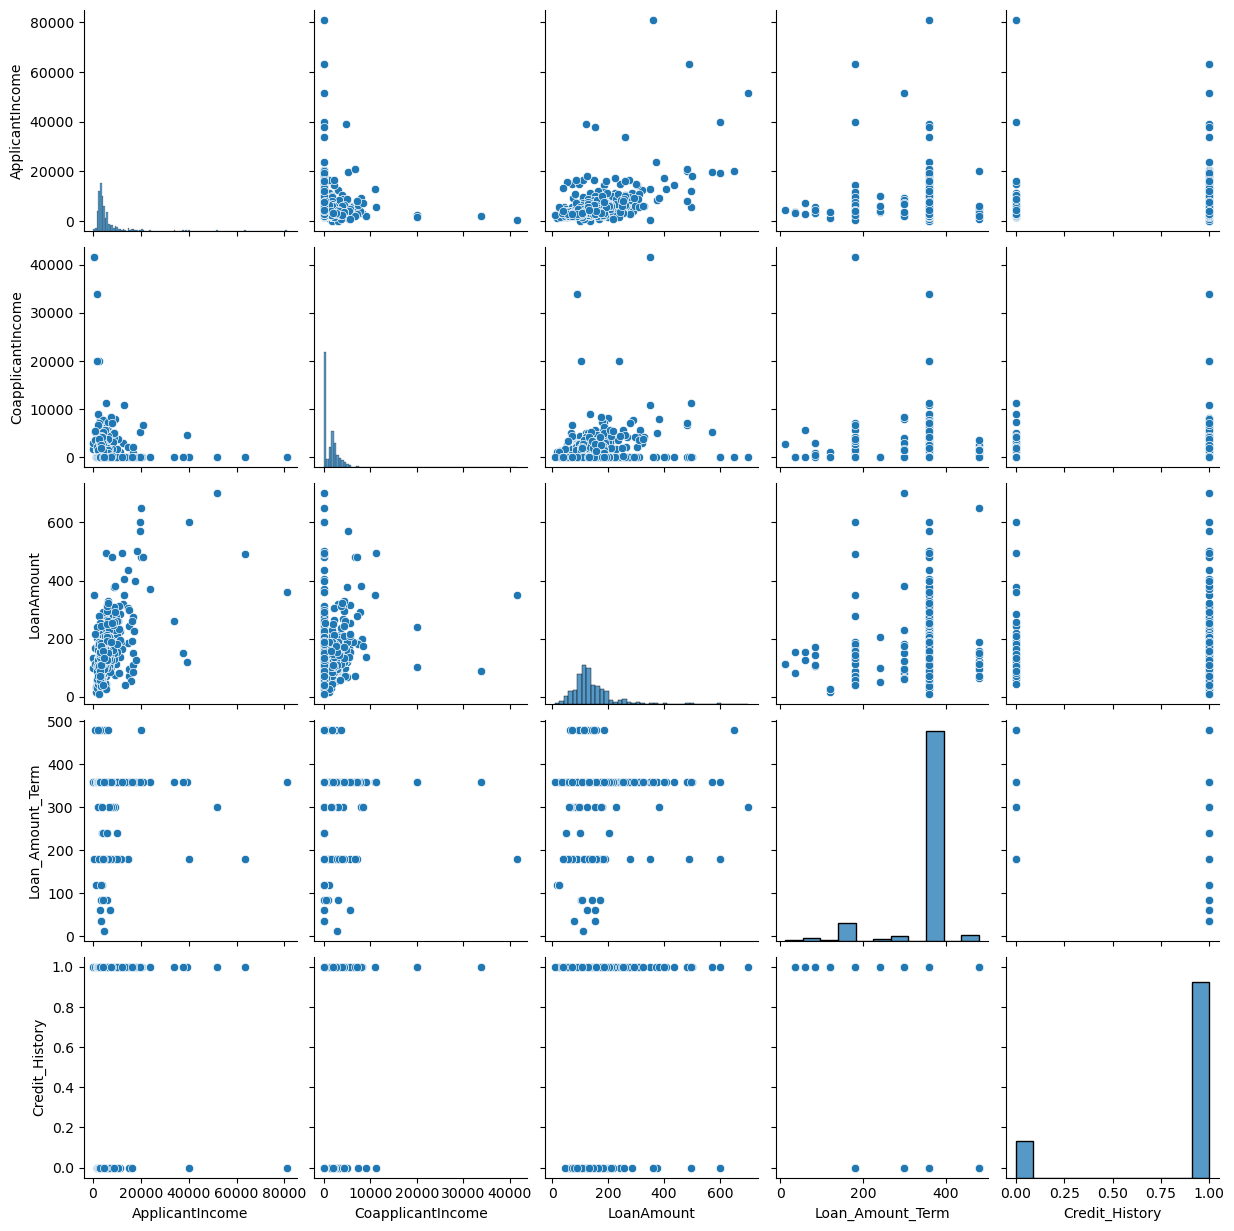

In [90]:
sns.pairplot(data=df)

Handling missing values

In [91]:
#Using imputation method for missing values

null_cols=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

In [92]:
for i in null_cols:
    df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [93]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
#Filling mean values in LoanAmount missing values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [95]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [96]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Encoding of Categorical columns

In [99]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in catcols:
    df[i]=enc.fit_transform(df[i])

In [100]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


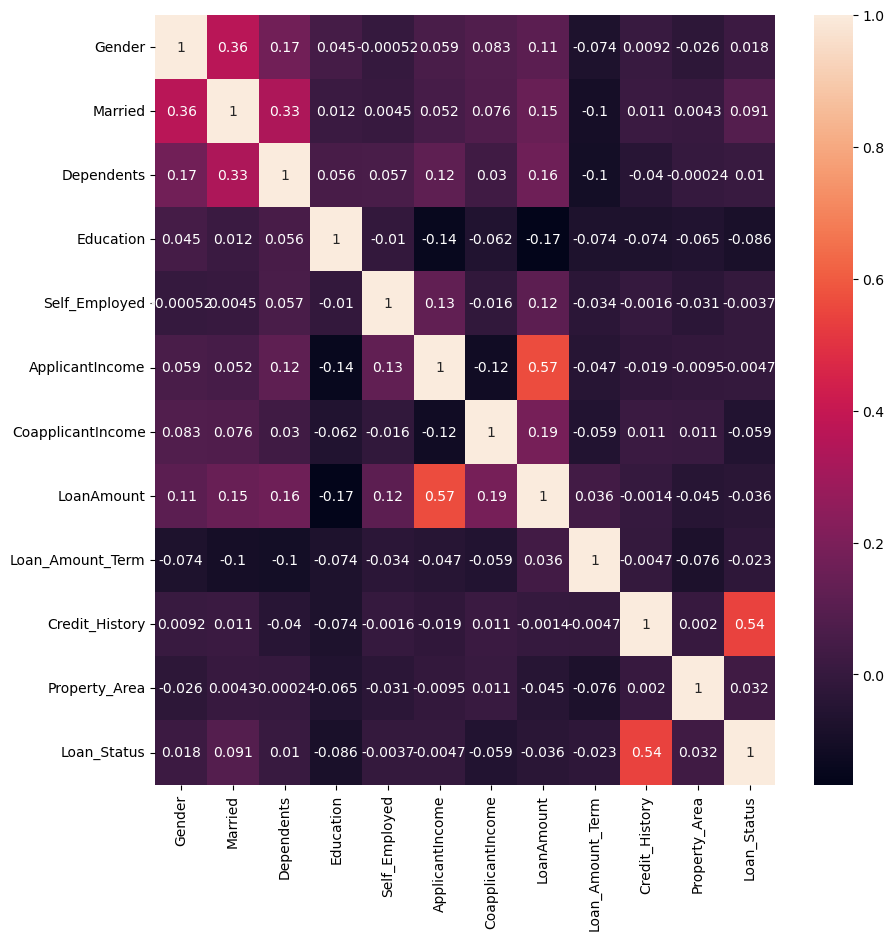

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
df.corr()

High correlationship found between credit_history and Loan Status. Also between LoanAMount and ApplicantIncome

In [107]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [108]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])

In [111]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Standardization of data

In [119]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [120]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,18.017473,0.000000,146.412162,360.0,1.0,2
1,1,1,1,0,0,16.610522,11.467457,128.000000,360.0,1.0,0
2,1,1,0,0,1,14.422496,0.000000,66.000000,360.0,1.0,2
3,1,1,0,1,0,13.720654,13.310098,120.000000,360.0,1.0,2
4,1,0,0,0,0,18.171206,0.000000,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,14.260431,0.000000,71.000000,360.0,1.0,0
610,1,1,3,0,0,16.013010,0.000000,40.000000,180.0,1.0,0
611,1,1,1,0,0,20.059821,6.214465,253.000000,360.0,1.0,2
612,1,1,2,0,0,19.646281,0.000000,187.000000,360.0,1.0,2


In [121]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [123]:
x1=scaler.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.380325,-1.053225,0.000000,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.022870,0.561256,-0.219273,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.533028,-1.053225,-0.957641,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.711341,0.820678,-0.314547,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.419383,-1.053225,-0.064454,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.574203,-1.053225,-0.898095,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.128936,-1.053225,-1.267279,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.899211,-0.178302,1.269371,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.794146,-1.053225,0.483367,0.273231,0.411733,1.223298


In [125]:
#checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

      Values           Features
0   1.198880             Gender
1   1.359130            Married
2   1.180346         Dependents
3   1.070184          Education
4   1.040728      Self_Employed
5   2.162496    ApplicantIncome
6   1.492313  CoapplicantIncome
7   1.902177         LoanAmount
8   1.040027   Loan_Amount_Term
9   1.007888     Credit_History
10  1.019343      Property_Area


Modeling

In [126]:
#importing models and libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [127]:
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr=RandomForestClassifier()
    rfr.fit(x_train, y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Best acc is ', maxAccu, 'at random state', maxRs)

Best acc is  0.8486486486486486 at random state 39


In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
def model(m):
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy Score: ',accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

RandomForestClassifier

In [133]:
rfc=RandomForestClassifier()
model(rfc)

Accuracy Score:  76.21621621621621
[[ 26  35]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.74      0.43      0.54        61
           1       0.77      0.93      0.84       124

    accuracy                           0.76       185
   macro avg       0.75      0.68      0.69       185
weighted avg       0.76      0.76      0.74       185



LogisticRegression

In [134]:
lr=LogisticRegression()
model(lr)

Accuracy Score:  78.37837837837837
[[ 24  37]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.89      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.78      0.76       185



SupportVectorClassifier

In [135]:
svc=SVC()
model(svc)

Accuracy Score:  78.37837837837837
[[ 23  38]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.92      0.38      0.53        61
           1       0.76      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.84      0.68      0.70       185
weighted avg       0.81      0.78      0.75       185



GradientBoostingClassifier

In [136]:
gb=GradientBoostingClassifier()
model(gb)

Accuracy Score:  75.13513513513513
[[ 25  36]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        61
           1       0.76      0.92      0.83       124

    accuracy                           0.75       185
   macro avg       0.74      0.66      0.68       185
weighted avg       0.74      0.75      0.73       185



AdaBoostClassifier

In [137]:
abc=AdaBoostClassifier()
model(abc)

Accuracy Score:  75.67567567567568
[[ 26  35]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.72      0.43      0.54        61
           1       0.77      0.92      0.84       124

    accuracy                           0.76       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.75      0.76      0.74       185



BaggingClassifier

In [138]:
bc=BaggingClassifier()
model(bc)

Accuracy Score:  71.35135135135135
[[ 26  35]
 [ 18 106]]
              precision    recall  f1-score   support

           0       0.59      0.43      0.50        61
           1       0.75      0.85      0.80       124

    accuracy                           0.71       185
   macro avg       0.67      0.64      0.65       185
weighted avg       0.70      0.71      0.70       185



ExtraTreesClassifier

In [139]:
etc=ExtraTreesClassifier()
model(etc)

Accuracy Score:  75.13513513513513
[[ 27  34]
 [ 12 112]]
              precision    recall  f1-score   support

           0       0.69      0.44      0.54        61
           1       0.77      0.90      0.83       124

    accuracy                           0.75       185
   macro avg       0.73      0.67      0.68       185
weighted avg       0.74      0.75      0.73       185



In [140]:
from sklearn.model_selection import cross_val_score

In [147]:
def scr(m):
    score=cross_val_score(m,x,y)
    print(score.mean())
    print('Diff b/w Accuracy score & CV score: ',(accuracy_score(y_test,pred) - score.mean())*100)

RandomForestClassifier

In [148]:
scr(rfc)

0.7817539650806344
Diff b/w Accuracy score & CV score:  -1.959180291847229


LogisticRegression

In [149]:
scr(lr)

0.8061975209916034
Diff b/w Accuracy score & CV score:  -4.403535882944121


SupportVectorClassifier

In [150]:
scr(svc)

0.8029454884712781
Diff b/w Accuracy score & CV score:  -4.078332630911596


GradientBoostingClassifier

In [151]:
scr(gb)

0.7784886045581768
Diff b/w Accuracy score & CV score:  -1.6326442396014662


AdaBoostClassifier

In [152]:
scr(abc)

0.7784752765560442
Diff b/w Accuracy score & CV score:  -1.6313114393882056


BaggingClassifier

In [153]:
scr(bc)

0.7459282953485273
Diff b/w Accuracy score & CV score:  1.6233866813634812


ExtraTreesClassifier

In [154]:
scr(etc)

0.765480474476876
Diff b/w Accuracy score & CV score:  -0.33183123147138005


# Extra Trees Classifier is our best model!

Hyperparameter tuning

In [156]:
#importing RandomizedseachCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [157]:
parameters = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'random_state': [10, None],
    'n_jobs': [1, -1],
}

In [160]:
gsv = GridSearchCV(ExtraTreesClassifier(), parameters)
gsv.fit(x_train, y_train)
print(gsv.best_params_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': 1, 'random_state': 10}


In [161]:
Hyper_etc=RandomForestClassifier(max_depth=2,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=50,n_jobs=1,random_state=10)

In [162]:
model(Hyper_etc)

Accuracy Score:  78.37837837837837
[[ 24  37]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.89      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.78       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.78      0.76       185



# Accuracy after hyperparameter tuning of Extra Trees Classifier is 78.37%

In [164]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob=Hyper_etc.predict_proba(x_test)[:,1]
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,Hyper_etc.predict(x_test)))




ROC Score 0.6846245372818615


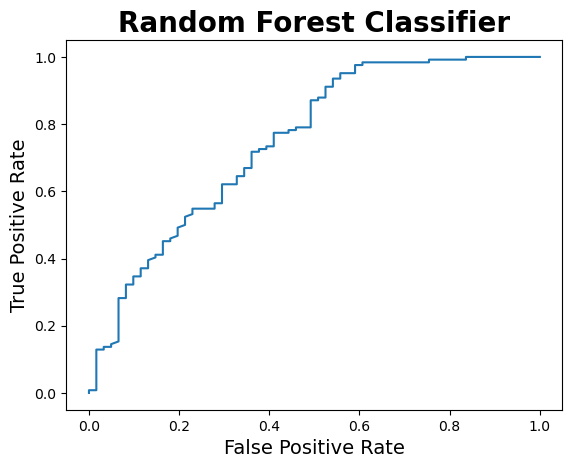

In [165]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('Random Forest Classifier',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

In [166]:
Final_model=Hyper_etc

In [167]:
#Saving our model
import joblib
joblib.dump(Final_model,'LoanPrediction.pkl')

['LoanPrediction.pkl']

In [168]:
model=joblib.load('LoanPrediction.pkl')
Prediction=model.predict(x_test)
Prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1])

In [170]:
Comparison=pd.DataFrame()
Comparison['True Value']=y_test
Comparison['Prediciton']=Prediction
Comparison

,True Value,Prediciton
562,1,1
545,1,1
162,0,0
191,0,1
10,1,1
...,...,...
612,1,1
603,1,1
199,0,1
124,1,1
